# _***Prediccion de enfermedades cardiacas***_

Para este analisis se dispone de un conjunto de datos en formato `csv` que contiene la informacion de varias métricas de salud de pacientes cardíacos, este conjunto incluye datos como la edad, la presión arterial, la frecuencia cardíaca, colesterol, gleusemia entre otros.

Se realizara un modelo el cual hara la predicción de enfermedades cardiacas en una persona, para esto se tiene un conjunto de datos donde esta alojada la información de varias métricas de salud de pacientes cardíacos a la cual se le realizara una limpieza de datos para poder hacer calculos precisos para una prediccion optima, fuera de eso se implementaran las tecnicas de analisis exploratorio las cuales ayudaran a analizar los datos de una manera visual para entender los datos mas facil, luego se seleccionara el algoritmo de regresion el cual servira para entrenar el modelo de datos y de acuerdo a los resultados de las metricas calculadas por el modelo se analizara cual de los modelos es mas acertivo en la precicción.

Una vez se tiene el modelo de datos con mayor acertividad en las predicciones de las enfermedades cardiacas se hara una simulación donde se le pasaran por parametro cada uno de los valores de las metricas de cada paciente, dichos valores son los campos que contiene el conjunto de datos y de acuerdo a dichas metricas el sistema dira si esa persona esta enferma o esta sana.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## _***1: DATA WRANGLING.***_

+ Obtener conjunto de datos por medio del metodo `read_csv` de la libreria `Pandas`

In [2]:
url = "https://raw.githubusercontent.com/GabrielCastro1221/csv_dataScience/main/heart1.csv"
df = pd.read_csv(url)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


+ Con el metodo `info` de la libreria `Pandas` se muestra la informacion detallada del conjunto de datos.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Una vez se analiza la información que se obtiene con el metodo `info` de la libreria `pandas`, se puede deducir lo siguiente:

+ Numero de registros 1025.

+ Numero de campos 14.

+ En el conjunto de datos solo hay un campo de tipo float (oldpeak), el resto de campos son de tipo entero.

+ el conjunto de datos no contiene valores nulos.

_***NOTA:***_ Según los tipos de datos y las explicaciones de características que obtuvimos anteriormente, podemos ver que 9 columnas (sex, cp, fbs, restecg, exang, pendiente, ca, thal y target) son de tipo de dato numérico. Estas características deben convertirse al tipo de datos de cadena `Objet` para poder hacer un análisis e interpretación adecuados.

Para transformar el tipo de dato se siguen los siguientes pasos:

+ se crea una variable a la cual se le asignaran los campos del conjunto de datos a los cuales se les aplicara la transformacion de datos, a esta variable se le asigna el nombre de `continous_features`.

+ se crea una segunda variable la cual genera una lista que contendra los nombres de los campos del conjunto de datos, esta variable contiene un ciclo for el cual iterara cada uno de los campos y solo transformara los campos asignados a la varible `continous_feature`

+ por ultimo se ejecuta el metodo `astype("object")` para convertir los campos de datos que se transformaran en tipo `Object`

In [4]:
continuous_features = ["age", "trestbps", "chol", "thalach", "oldpeak"]
features_to_convert = [feature for feature in df.columns if feature not in continuous_features]
df[features_to_convert] = df[features_to_convert].astype("object")
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target       object
dtype: object

Con el metodo `describe().T` de pandas se muestran los resultados estadisticos de los datos numericos del conjunto de datos.

_***NOTA:***_ el metodo describe con el `.T` lo que hace es cambiar la horientacion de la tabla. a mi parecer se analizan mejor los datos de esta manera,

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


De acuerdo a la información proporcinada por el metodo `describe` de la libreria `pandas` se puede deducir lo siguiente:

+ `age:` La edad promedio de los pacientes es de aproximadamente 54 años, siendo el más joven 29 y el mayor 77 años.

+ `trestbps:` La presión arterial promedio en reposo es de aproximadamente 131,6mm/Hg, con un rango de 94 a 200 mm/Hg.

+ `chol:` El nivel promedio de colesterol es de aproximadamente 246 mg/dl, con un mínimo de 126 y un máximo de 564 mg/dl.

+ `Thalach:` La frecuencia cardíaca máxima media alcanzada ronda los 149,1, con un rango de 71 a 202.

+ `oldpeak:` La depresión ST promedio inducida por el ejercicio en relación con el reposo es aproximadamente 1,07, con valores que oscilan entre 0 y 6,2.

A continuacion se usara el metodo `describe(include="object").T` de `pandas`, este metodo muestra los resultados estadisticos de los datos categoricos del conjunto de datos.

In [6]:
df.describe(include="object").T

,count,unique,top,freq
sex,1025,2,1,713
cp,1025,4,0,497
fbs,1025,2,0,872
restecg,1025,3,1,513
exang,1025,2,0,680
slope,1025,3,1,482
ca,1025,5,0,578
thal,1025,4,2,544
target,1025,2,1,526


De acuerdo con la información proporcionada por el metodo que se ejecuto en el paso anterior se puede deducir lo siguiente:

+ `sex:` Hay dos valores únicos, la categoria que predomina segun el analisis es el sexo femenino a la que corresponde el valor 1, apareciendo con una frecuencia de 713 veces en el conjunto de datos.

+ `cp:` Hay cuatro categorias unicas. El tipo más común es "0" (que indica que es angina tipica) y aparece con una frecuencia 497 veces en el conjunto de datos.

+ `fbs:` Hay dos categorías, y la más frecuente es "0" (que indica azúcar en sangre en ayunas inferior a 120 mg/dl), que aparece 872 veces en el conjunto de datos.

+ `restecg:` Hay tres categorias únicas. El resultado más común es "1" (que indica tener anomalia en la onda ST) y aparece con una frecuencia de 513 veces en el conjunto de datos.

+ `exang:` Hay dos categorias únicas. El valor más frecuente es "0" (que indica que no hay angina inducida por el ejercicio), que apacere 680 veces en el conjunto de datos.

+ `slope:` Hay tres categorias únicas. El tipo de pendiente más frecuente es el "1" (que indica pendiente plana), que se presenta con una frecuencia de 482 veces en el conjunto de datos.

+ `ca:` Hay cinco categorias únicas para el número de vasos principales coloreados mediante fluoroscopia, siendo "0" el más frecuente y aparece con una frecuencia de 578 veces en el conjunto de datos.

+ `thal:` Hay cuatro categorias únicas disponibles. El tipo más común es el "2" (que indica un defecto reversible),y aparece con una frecuancia de 544 veces en el conjunto de datos.

+ `target:` hay dos categorias únicas indican la presencia o ausencia de enfermedad cardíaca. El valor "1" (que indica la presencia de enfermedades cardíacas) es el más frecuente, y aparece con una frecuencia de 526 veces en el conjunto de datos.

## _***2. EXPLORATORY DATA ANALYSIS (EDA)***_.

### _***2.1. Analisis univariado***_

Al emplear esta técnica de visualización, se comprenderan mejor las características individuales de cada característica del conjunto de datos.

#### _***Datos continuos***_

Se emplearan visualizaciones de tipo `histograma` para obtener información sobre la distribución de cada caracteristica. Esto nos permite comprender la tendencia central, la extensión y la forma de la distribución del conjunto de datos.

para visualizar los histogramas se siguen los siguientes pasos:

+ Se crea una variable la cual contendra las caracteristicas continuas de los datos.

+ Se implementa un `bucle for` el cual iterara las variables continuas del conjunto de datos y trazara los caracteres en los respectivos histogramas.

+ Se genera el grafico que recibe los datos de la serie `df_continuos` los cuales se trazan en el eje X 

+ Se Asignan los labels que llevara cada uno de los ejes y sus respectivos estilos de visualización

+ Se crea un cuadro de texto en el gráfico del histograma, mostrando la media y la desviación estándar de los datos.

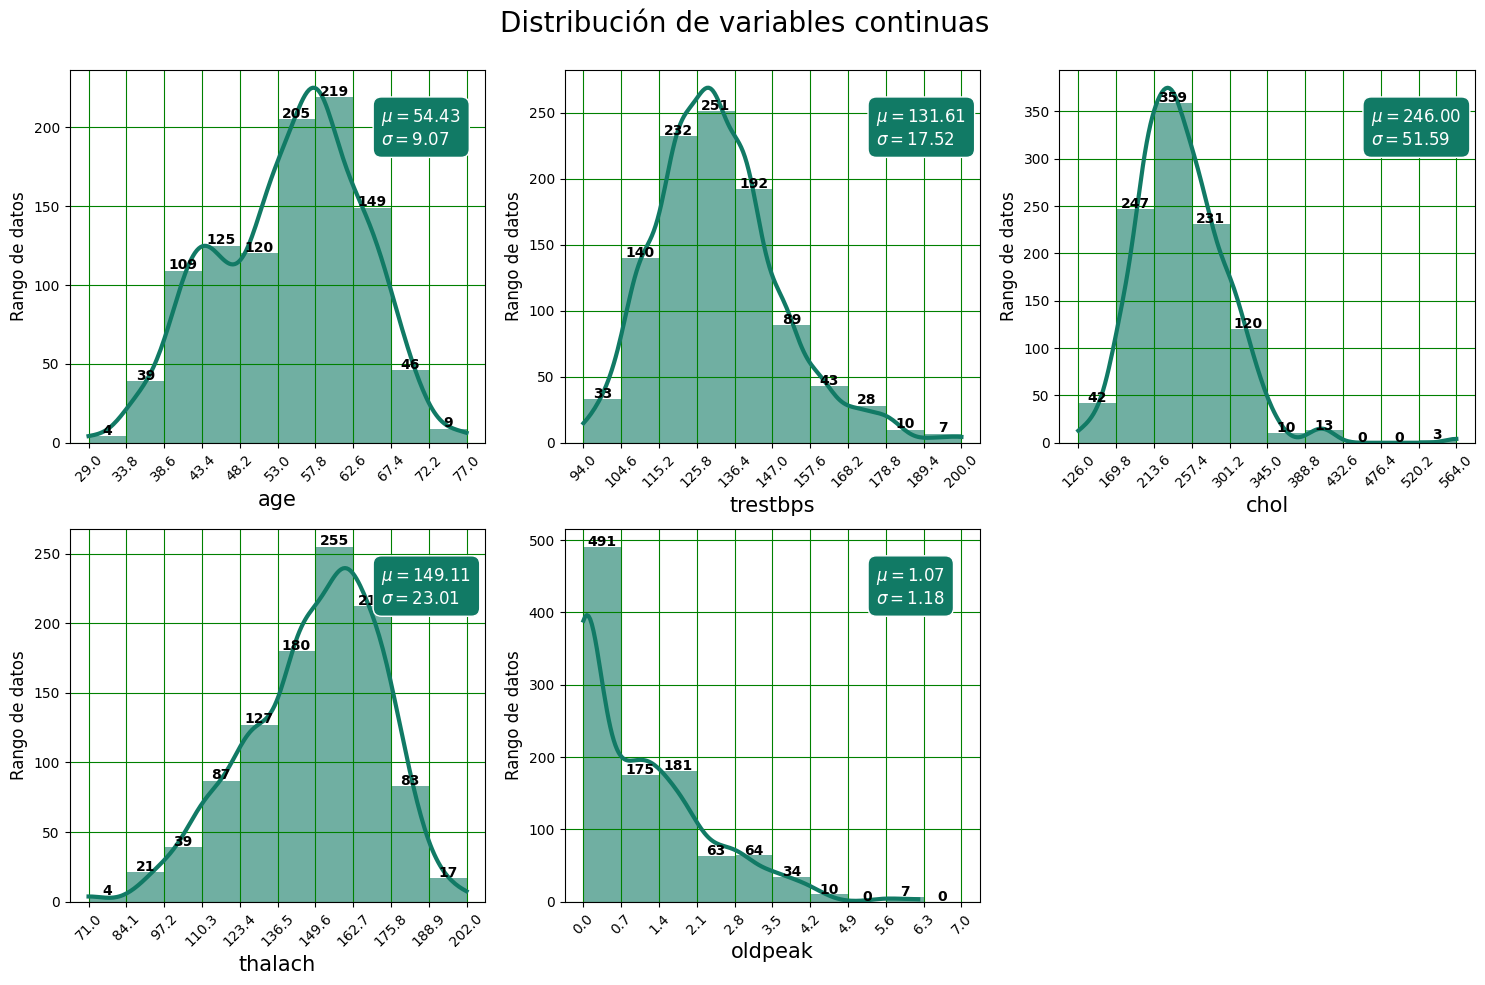

In [7]:
df_continuous = df[continuous_features]
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for i, col in enumerate(df_continuous.columns):
    x = i // 3
    y = i % 3 
    values, bin_edges = np.histogram(df_continuous[col], 
    range=(np.floor(df_continuous[col].min()), np.ceil(df_continuous[col].max())))

    graph = sns.histplot(data=df_continuous, x=col, bins=bin_edges, kde=True, ax=ax[x, y],
    edgecolor='none', color='#117A65', alpha=0.6, line_kws={'lw': 3})
    
    ax[x, y].set_xlabel(col, fontsize=15)
    ax[x, y].set_ylabel('Rango de datos', fontsize=12)
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
    ax[x, y].grid(color='Green')
    
    for j, p in enumerate(graph.patches):
        ax[x, y].annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1),
        ha='center', fontsize=10, fontweight="bold")
        
    textstr = '\n'.join((
        r'$\mu=%.2f$' % df_continuous[col].mean(),
        r'$\sigma=%.2f$' % df_continuous[col].std() 
    ))
   
    ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12, verticalalignment='top',
    color='white', bbox=dict(boxstyle='round', facecolor='#117A65', edgecolor='white', pad=0.5))

ax[1,2].axis('off')
plt.suptitle('Distribución de variables continuas', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

+ _***Edad***_ `AGE:` 
    + la distribución es algo uniforme, pero hay un pico alrededor de los 50 años. 
    + La edad media es de aproximadamente 54,43 años 
    + La desviación estándar es de 9,07 años.

+ _***Presión arterial en reposo***_ `trestbps:` 
    + La presión arterial en reposo para la mayoría de las personas se concentra alrededor de 120-140 mm/Hg.
    + La media de aproximadamente 131,61 mm/Hg
    + La deesviación estándar es de 17,52 mm/Hg.

+ _***Colesterol sérico***_ `chol:` 
    + la mayoría de las personas tienen niveles de colesterol entre 200 y 300 mg/dl. 
    + El nivel medio de colesterol ronda los 246 mg/dl.
    + La desviación estándar es de 51,59 mg/dl.

+ _***Frecuencia cardíaca máxima alcanzada***_ `thalach:` 
    + la mayoría de las personas alcanzan una frecuencia cardíaca entre 140 y 170 lpm durante una prueba de esfuerzo.
    + La frecuencia cardíaca media alcanzada es de aproximadamente 149,11 bpm
    + La desviación estándar es de 23,01 bpm.

+ _***Depresión del ST inducida por el ejercicio***_ `oldpeak:` 
    + la mayoría de los valores se concentran hacia 0, lo que indica que muchos individuos no experimentaron una depresión del ST significativa durante el ejercicio. 
    + El valor medio de depresión del ST es 1,07.
    + La desviación estándar es de 1,18.

Al revisar los histogramas en los cuales se visualizan características continuas y compararlos con las descripciones de las características proporcionadas, todo parece consistente y dentro de los rangos esperados. No parece haber ningún ruido perceptible ni valores inverosímiles entre las variables continuas.

### _***Datos categoricos***_

Para visualizar los datos categoricos se utilizan `gráficos de barras` para visualizar la frecuencia de cada categoría. Esto proporciona una representación clara de la prominencia de cada categoría dentro de la característica respectiva.

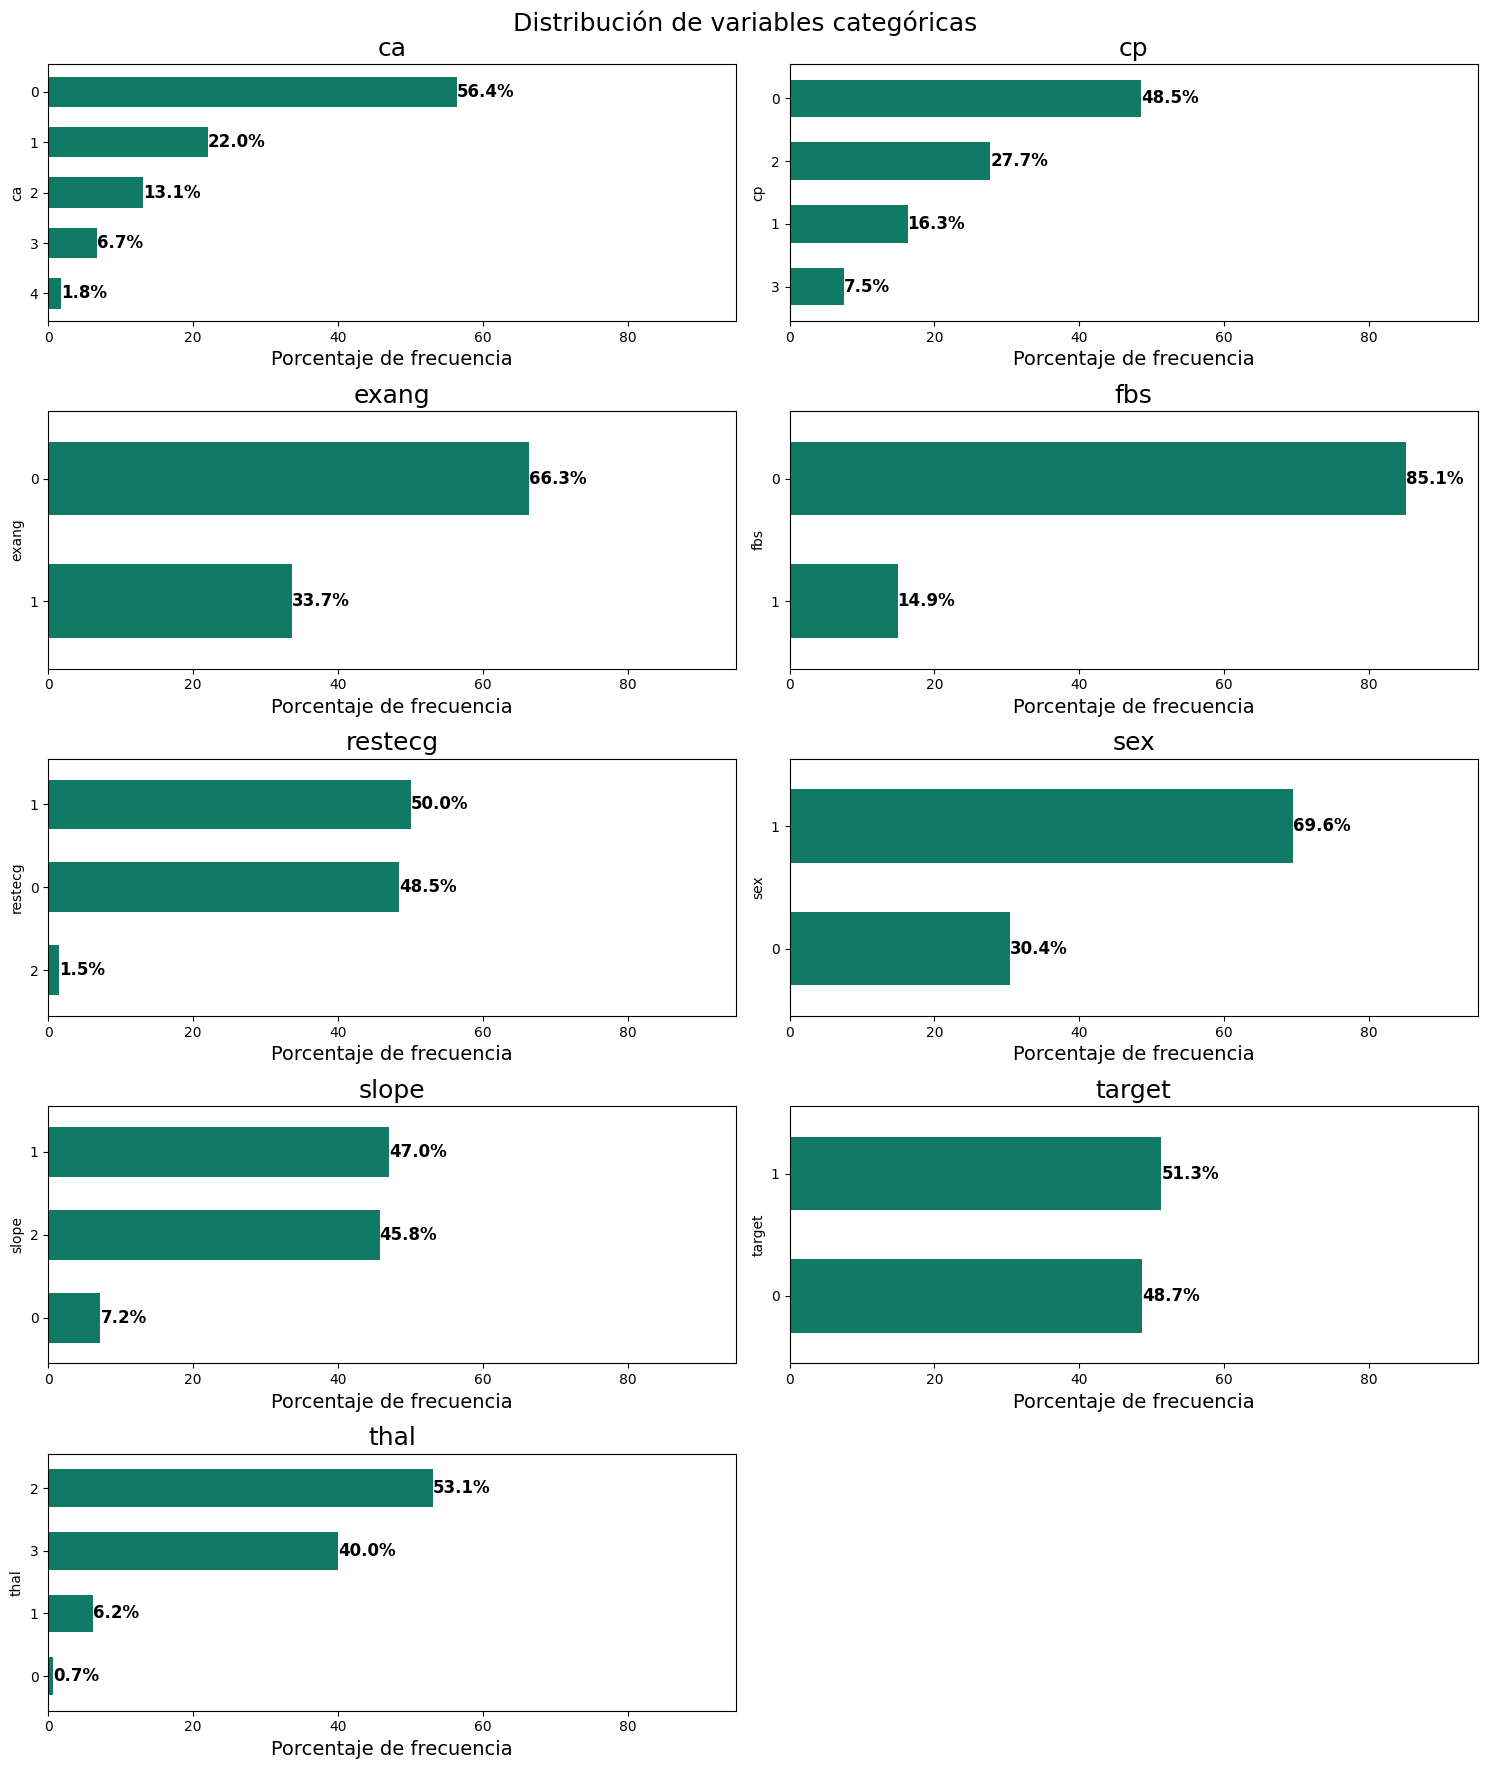

In [8]:
categorical_features = df.columns.difference(continuous_features)
df_categorical = df[categorical_features]
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15, 18))

for i, col in enumerate(categorical_features):
    row = i // 2
    col_idx = i % 2 
        
    value_counts = df[col].value_counts(normalize=True).mul(100).sort_values()
    value_counts.plot(kind='barh', ax=ax[row, col_idx], width=0.6, color='#117A65')
    
    for index, value in enumerate(value_counts):
        ax[row, col_idx].text(value, index, str(round(value, 1)) + '%', fontsize=12, weight='semibold', va='center')
        ax[row, col_idx].set_xlim([0, 95])
        ax[row, col_idx].set_xlabel('Porcentaje de frecuencia', fontsize=14)
        ax[row, col_idx].set_title(f'{col}', fontsize=18)

ax[4,1].axis('off')
plt.suptitle('Distribución de variables categóricas', fontsize=18)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

+ _***sexo***_: 
    `sex`: el conjunto de datos es predominantemente femenino y constituye una mayoría significativa.

+ _***Tipo de dolor torácico***_: 
    `cp`: el conjunto de datos muestra diversos tipos de dolor torácico entre los pacientes. El tipo 0 (angina típica) parece ser el más frecuente, pero a partir de los gráficos de barras se puede inferir una distribución exacta entre los tipos.

+ _***Azúcar en sangre en ayunas***_: 
    `fbs`: una mayoría significativa de los pacientes tienen su nivel de azúcar en sangre en ayunas por debajo de 120 mg/dl, lo que indica que el nivel alto de azúcar en sangre no es una condición común en este conjunto de datos.

+ _***Resultados electrocardiográficos en reposo***_: 
    `restecg`: Los resultados muestran resultados electrocardiográficos en reposo variados, siendo sinedo 1 (Tener anomalía de la onda ST-T) el mas frecuente por una minima diferencia. 

+ _***Angina inducida por el ejercicio***_:
    `exang`: la mayoría de los pacientes no experimentan angina inducida por el ejercicio, lo que sugiere que podría no ser un síntoma común entre los pacientes de este conjunto de datos.

+ _***Pendiente del segmento ST del ejercicio máximo***_:
    `slope`: el conjunto de datos muestra diferentes pendientes del segmento ST del ejercicio máximo. siendo 1 (Pendiente Plana) el mas frecuente.

+ _***Número de vasos principales coloreados mediante fluoroscopia***_:
    `ca`: la mayoría de los pacientes tienen menos vasos principales coloreados mediante fluoroscopia, siendo 0 el más frecuente.

+ _***Resultado de la prueba de estrés con talio***_:
    `thal`: el conjunto de datos muestra una variedad de resultados de las pruebas de estrés con talio. siendo 1 (Defecto solucionado) el mas frecuente.

+ _***Presencia de enfermedades cardíacas***_:
    `target`: el conjunto de datos está casi equilibrado en términos de presencia de enfermedades cardíacas: alrededor del 54,5 % las padece y el 45,5 % no las padece.

### _***2.2. Analisis bivariado.***_

A través de esta técnica de visualización, obtendremos una comprensión más profunda de la relación entre las características individuales y el objetivo, revelando posibles predictores de enfermedades cardíacas.

#### _***Datos continuos***_

Se utilizaran gráficos de barras para mostrar el valor promedio de cada característica para los diferentes campos categoricos, y gráficos de KDE para comprender la distribución de cada característica entre los campos categoricos. Esto ayuda a evaluar cómo varía cada característica entre los dos resultados objetivo.

Se graficara cada característica continua frente al objetivo usando dos tipos de gráficos.

`Gráficos de barras:` Muestra los valores medios.
`Gráficos de KDE:` muestra la distribución para cada categoría de destino.

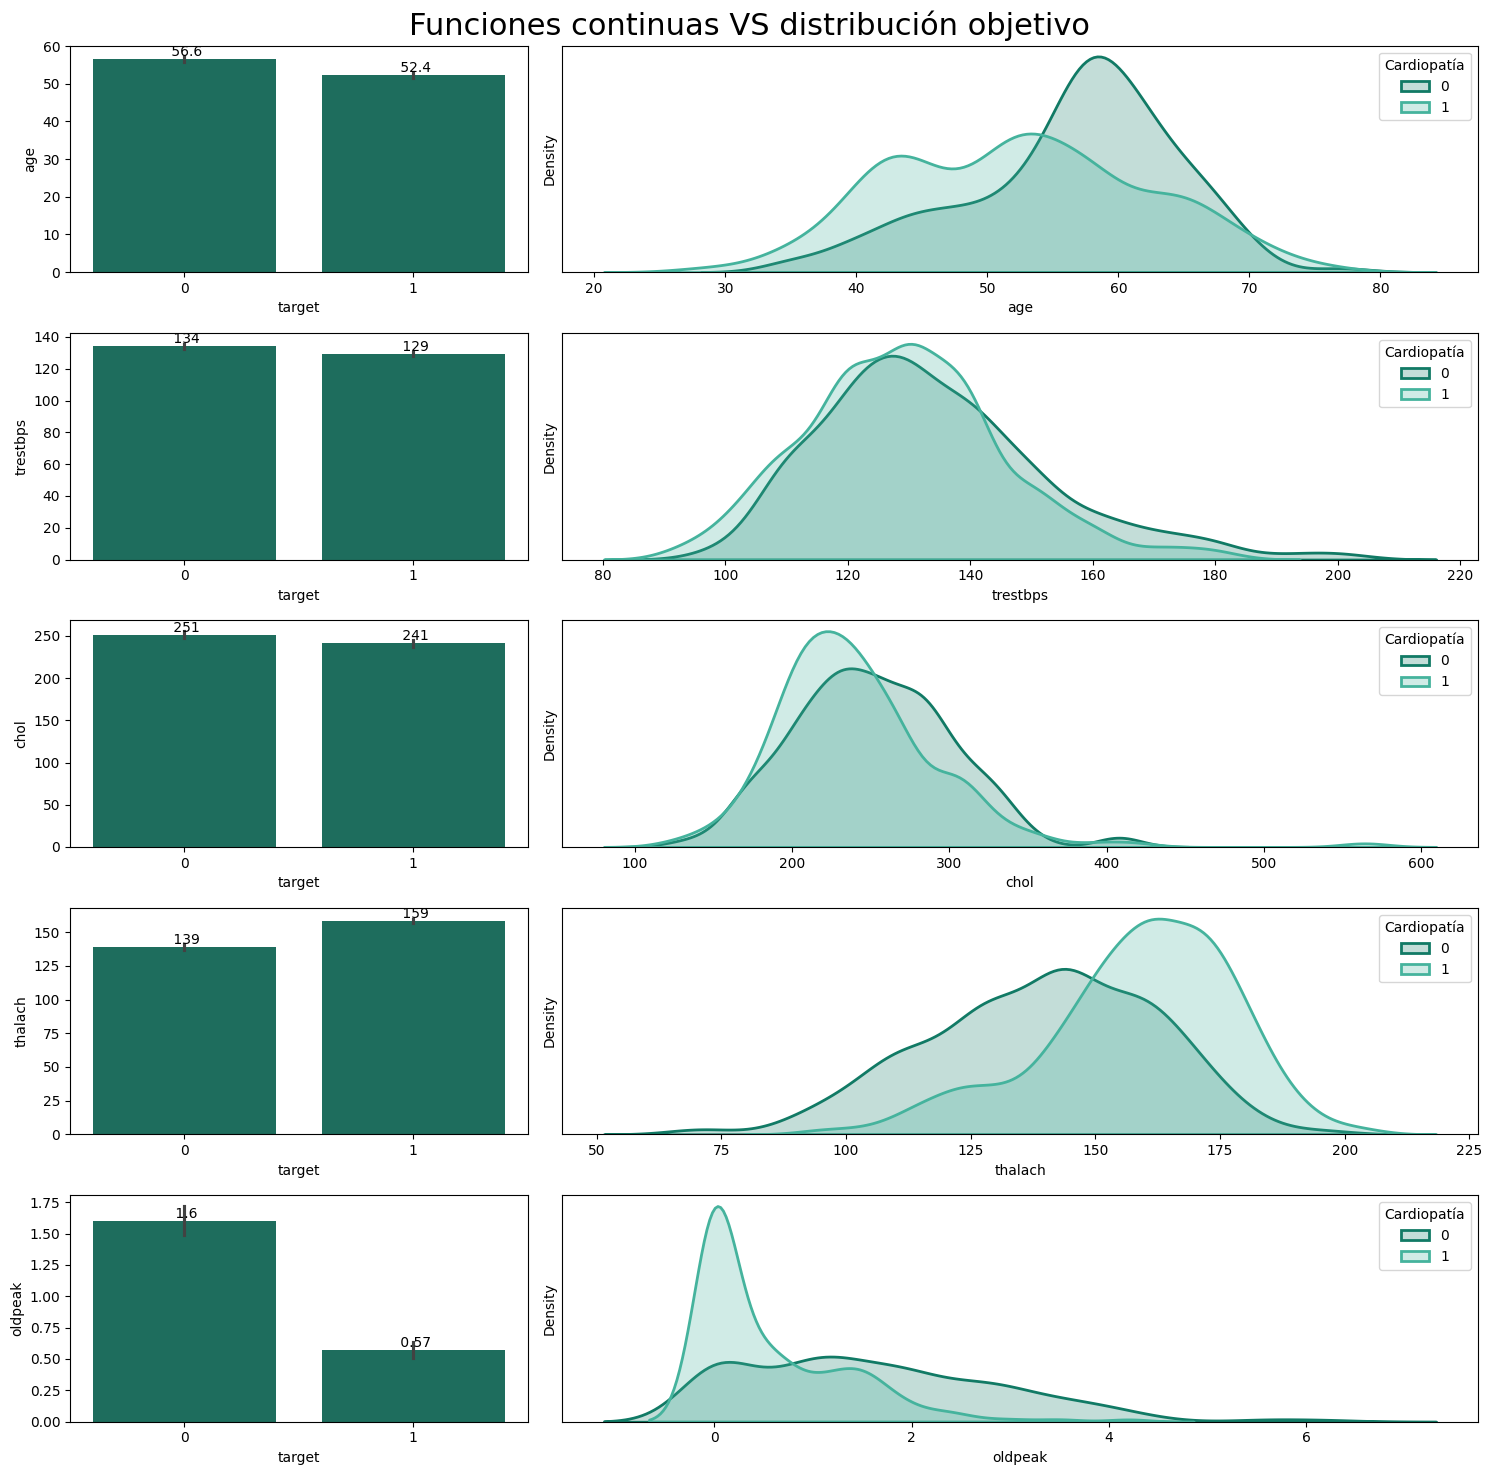

In [9]:
sns.set_palette(['#117A65', '#45B39D'])

fig, ax = plt.subplots(len(continuous_features), 2, figsize=(15,15), gridspec_kw={'width_ratios': [1, 2]})

for i, col in enumerate(continuous_features):
    graph = sns.barplot(data=df, x="target", y=col, ax=ax[i,0])
    
    sns.kdeplot(data=df[df["target"]==0], x=col, fill=True, linewidth=2, ax=ax[i,1], label='0')
    sns.kdeplot(data=df[df["target"]==1], x=col, fill=True, linewidth=2, ax=ax[i,1], label='1')
    ax[i,1].set_yticks([])
    ax[i,1].legend(title='Cardiopatía', loc='upper right')

    for cont in graph.containers:
        graph.bar_label(cont, fmt=' %.3g')
        
plt.suptitle('Funciones continuas VS distribución objetivo', fontsize=22)
plt.tight_layout()                     
plt.show()

+ _***Edad***_ `age`: Las distribuciones muestran un ligero cambio, siendo los pacientes con enfermedades cardíacas un poco más jóvenes en promedio que los que no las padecen. La edad media de los pacientes sin enfermedades cardíacas es mayor.

+ _***Presión arterial en reposo***_ `trestbps`: Ambas categorías muestran distribuciones superpuestas en el gráfico de KDE, con valores medios casi idénticos, lo que indica un poder diferenciador limitado para esta característica.

+ _***Colesterol sérico***_ `chol`: Las distribuciones de los niveles de colesterol para ambas categorías son bastante cercanas, pero el nivel medio de colesterol para pacientes con enfermedades cardíacas es ligeramente menor.

+ _***Frecuencia cardíaca máxima alcanzada***_ `thalach`: hay una diferencia notable en las distribuciones. Los pacientes con enfermedades cardíacas tienden a alcanzar una frecuencia cardíaca máxima más alta durante las pruebas de esfuerzo en comparación con aquellos que no la padecen.

+ _***Depresión del ST***_ `oldpeak`: la depresión del ST inducida por el ejercicio en relación con el reposo es notablemente menor en pacientes con enfermedades cardíacas. Su distribución alcanza un máximo cercano a cero, mientras que la categoría de no enfermedad tiene una distribución más amplia.

Según la diferencia visual en las distribuciones y los valores medios, la frecuencia cardíaca máxima `thalach` parece tener el mayor impacto en el estado de la enfermedad cardíaca, seguida de la depresión del ST `oldpeak` y la edad `age`.

##  _***Características categóricas VS Target***_

A continuacion se comparara la proporción de cada categoría con el campo objetivo del conjunto de datos, tambien se podran observar los recuentos y porcentajes exactos en las barras.

In [10]:
categorical_features = [feature for feature in categorical_features if feature != 'target']

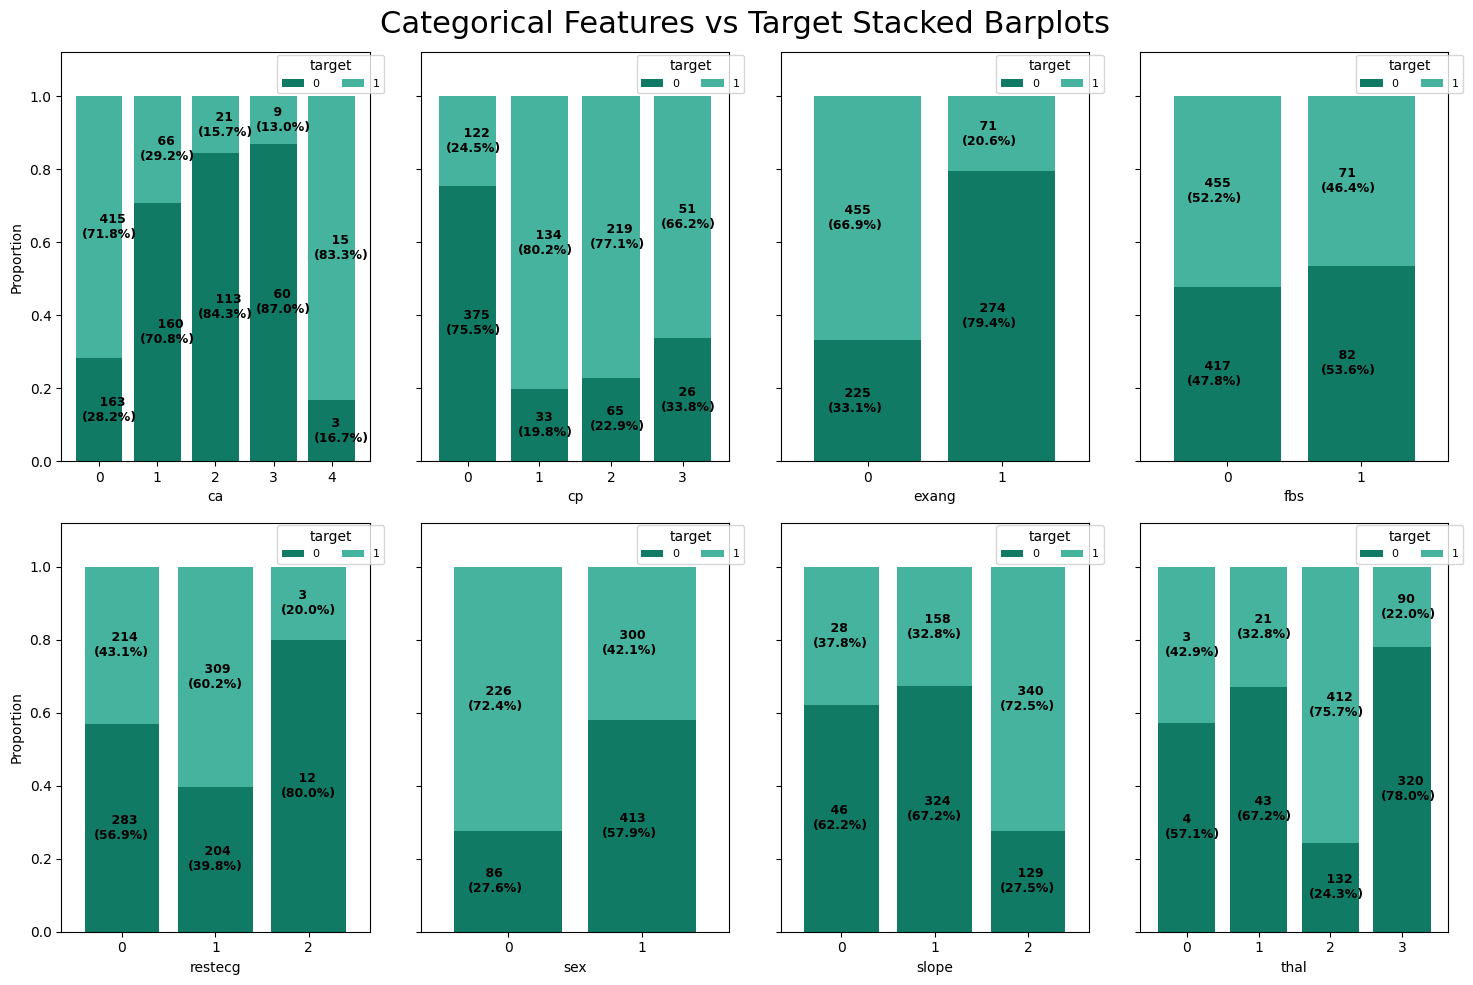

In [13]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(15,10))
for i,col in enumerate(categorical_features):
    cross_tab = pd.crosstab(index=df[col], columns=df['target'])
    cross_tab_prop = pd.crosstab(index=df[col], columns=df['target'], normalize='index')
    x, y = i//4, i%4
    cross_tab_prop.plot(kind='bar', ax=ax[x,y], stacked=True, width=0.8,
                        legend=False, ylabel='Proportion', sharey=True)
    for idx, val in enumerate([*cross_tab.index.values]):
        for (proportion, count, y_location) in zip(cross_tab_prop.loc[val],cross_tab.loc[val],cross_tab_prop.loc[val].cumsum()):
            ax[x,y].text(x=idx-0.3, y=(y_location-proportion)+(proportion/2)-0.03,
                         s = f'    {count}\n({np.round(proportion * 100, 1)}%)', 
                         color = "black", fontsize=9, fontweight="bold")
    ax[x,y].legend(title='target', loc=(0.7,0.9), fontsize=8, ncol=2)
    ax[x,y].set_ylim([0,1.12])
    ax[x,y].set_xticklabels(ax[x,y].get_xticklabels(), rotation=0)
    
plt.suptitle('Categorical Features vs Target Stacked Barplots', fontsize=22)
plt.tight_layout()                     
plt.show()

Segun el grafico de comparacion entre las variables actegoricas y el campo target se puede deducir lo siguiente:

+ _***Número de vasos principales***_ `ca`: la mayoría de los pacientes con enfermedades cardíacas tienen menos vasos principales coloreados mediante fluoroscopia. A medida que aumenta el número de vasos coloreados, la proporción de pacientes con enfermedades cardíacas tiende a disminuir. Especialmente, los pacientes con 0 vasos coloreados tienen una mayor proporción de presencia de enfermedades cardíacas.

+ _***Tipo de dolor torácico***_ `cp`: los diferentes tipos de dolor torácico presentan proporciones variadas de enfermedad cardíaca. En particular, los tipos Angina atipica (1), Dolor noanginoso (2) y Asintomatico (3) tienen una mayor proporción de presencia de enfermedades cardíacas en comparación con el tipo Angina tipica (0). Esto sugiere que el tipo de dolor en el pecho puede influir en la predicción de la enfermedad.

+ _***Angina inducida por el ejercicio***_ `exang`: los pacientes que no experimentaron angina inducida por el ejercicio (0) muestran una mayor proporción de presencia de enfermedad cardíaca en comparación con los que sí la experimentaron (1). Esta característica parece tener un impacto significativo en el objetivo.

+ _***Azúcar en sangre en ayunas***_ `fbs`: la distribución entre aquellos con azúcar en sangre en ayunas > 120 mg/dl (1) y aquellos sin azucar en la sangre (0) es relativamente similar, lo que sugiere que los fbs podrían tener un impacto limitado en la predicción de enfermedades cardíacas.

+ _***Resultados electrocardiográficos en reposo***_ `restecg`: el tipo Tener anomalía de la onda ST-T (1) muestra una mayor proporción de presencia de enfermedad cardíaca, lo que indica que esta característica podría tener alguna influencia en el resultado.

+ _***Sexo***_ `sex`: Las mujeres (1) presentan una menor proporción de presencia de enfermedades cardíacas en comparación con los hombres (0). Esto indica que el género es un factor influyente en la predicción de enfermedades cardíacas.

+ _***Pendiente del segmento ST del ejercicio máximo***_ `slope`: La pendiente tipo pendiente descendente (2) tiene una proporción notablemente mayor de presencia de enfermedades cardíacas, lo que indica su potencial como predictor significativo.

+ _***Resultado de la prueba de esfuerzo con talio***_ `thal`: La categoría de defecto reversible (2) tiene una mayor proporción de presencia de enfermedades cardíacas en comparación con las otras categorías, lo que enfatiza su importancia en la predicción.

- _***Mayor impacto en el objetivo***_: 
    - Numero de vasos principales `ca` 
    - Tipo de dolor torácico `cp`
    - Angina inducida por el ejercicio `exang`
    - sexo `sex`, 
    - Pendiente del segmento ST del ejercicio máximo `slope`
    - Resultado de la prueba de esfuerzo con talio `thal`

- _***Impacto moderado en el objetivo***_: 
    - Resultados electrocardiográficos en reposo `retecg`

- _***Menor impacto en el objetivo***_: 
    - Azúcar en sangre en ayunas `fbs`